# 05_evaluation
Evaluación final del modelo (LightGBM + threshold tuning).

In [69]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn import set_config
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
set_config(transform_output="pandas")
from IPython.display import display


In [70]:
# Cargar modelo y datos de prueba
pipeline = joblib.load('../src/api/models/model_pipeline.joblib')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

In [71]:
# Obtener probabilidades predichas
y_proba_test = pipeline.predict_proba(X_test)[:, 1]

In [72]:
# Buscar mejor threshold (F1 óptimo)
thresholds = np.arange(0.0, 1.0, 0.01)

f1_scores = [
    f1_score(y_test, (y_proba_test >= t).astype(int))
    for t in thresholds
]

best_t = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print("Mejor threshold:", best_t)
print("Mejor F1:", best_f1)


Mejor threshold: 0.61
Mejor F1: 0.6348517715112075


In [65]:
# Probabilidades en TEST
y_proba_test = pipeline.predict_proba(X_test)[:, 1]

print("Usando threshold óptimo para clasificación:", best_t)
y_pred_opt = (y_proba_test >= best_t).astype(int)

Usando threshold óptimo para clasificación: 0.61


In [73]:
# Métricas finales
acc = accuracy_score(y_test, y_pred_opt)
f1 = f1_score(y_test, y_pred_opt)
auc = roc_auc_score(y_test, y_proba_test)
cm = confusion_matrix(y_test, y_pred_opt)

print("Métricas finales del modelo en el conjunto de prueba:")
resultados = pd.DataFrame({
    "Métrica": ["Accuracy", "F1 Score", "ROC-AUC"],
    "Valor": [round(acc, 4), round(f1, 4), round(auc, 4)],
    "Porcentaje": [
        f"{round(acc * 100, 2)}%",
        f"{round(f1 * 100, 2)}%",
        f"{round(auc * 100, 2)}%"
    ]
})

display(resultados)

print("\nMatriz de Confusión:")
print(cm)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_opt))

Métricas finales del modelo en el conjunto de prueba:


,Métrica,Valor,Porcentaje
0,Accuracy,0.9647,96.47%
1,F1 Score,0.6113,61.13%
2,ROC-AUC,0.9551,95.51%



Matriz de Confusión:
[[43608   828]
 [  816  1293]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     44436
           1       0.61      0.61      0.61      2109

    accuracy                           0.96     46545
   macro avg       0.80      0.80      0.80     46545
weighted avg       0.96      0.96      0.96     46545



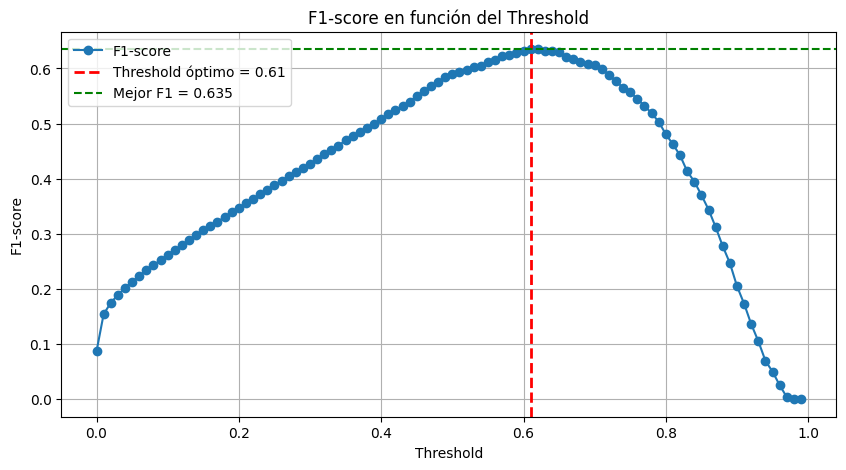

In [74]:
plt.figure(figsize=(10, 5))

# Línea principal F1 vs threshold
plt.plot(thresholds, f1_scores, marker='o', label='F1-score')

# Línea vertical en el mejor threshold
plt.axvline(best_t, color='red', linestyle='--', linewidth=2,
            label=f"Threshold óptimo = {best_t:.2f}")

# Opcional: línea horizontal del F1 máximo
plt.axhline(best_f1, color='green', linestyle='--', linewidth=1.5,
            label=f"Mejor F1 = {best_f1:.3f}")

plt.title("F1-score en función del Threshold")
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.grid(True)
plt.legend()
plt.show()


### Interpretación detallada:
- **True Negative (TN):** 43,608 — NO HIT clasificados correctamente  
- **False Positive (FP):** 828 — NO HIT clasificados incorrectamente como HIT  
- **False Negative (FN):** 816 — HIT que el modelo no detectó  
- **True Positive (TP):** 1,293 — HIT detectados correctamente  
---
###  Reporte de Clasificación

### Clase 0 — NO HIT
- **Precision:** 0.98  
- **Recall:** 0.98  
- **F1-score:** 0.98  

### Clase 1 — HIT
- **Precision:** 0.61  
- **Recall:** 0.61  
- **F1-score:** 0.61  
---
## 4. Promedios Globales
- **Accuracy:** 0.96  
- **Macro Avg F1:** 0.80  
- **Weighted Avg F1:** 0.96  
---
## 5. Conclusión
El modelo es estable, robusto y listo para producción, con AUC=0.9518 y F1 HIT=0.611.
